In [9]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn import preprocessing
from matplotlib import style
from sklearn import metrics
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [2]:
# read in data filtered dataset for ML analysis
df = pd.read_csv('yelp_final.csv')
df['stars'] = df['stars'].astype('str')
x = df.loc[:,list(df.columns)[14:]]
y = df.loc[:,'stars']
# create train test data for analysis
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
# set up SVM model
modelSVC = SVC()
modelSVC.fit(X_train, y_train)
# print accuracy of model using 1 train test split
print('Accuracy: ',modelSVC.score(X_test,y_test))
# print cross validation score
print('CrossValidation Result: ',cross_val_score(modelSVC, x, y, cv=2))
y_predSVC = modelSVC.predict(X_test)

Accuracy:  0.2656282450674974
CrossValidation Result:  [0.25764247 0.25898384]


In [10]:
# set Naive Bayes model
modelNB = BernoulliNB()
BernoulliNB(alpha=1.0) 
modelNB.fit(X_train, y_train)
# print accuracy of model using 1 train test split
print('Accuracy: ',modelNB.score(X_test,y_test))
# print cross validation score
print('CrossValidation Result: ',cross_val_score(modelNB, x, y, cv=2))
y_predNB = modelNB.predict(X_test)

Accuracy:  0.2557632398753894
CrossValidation Result:  [0.25220136 0.25840223]


In [11]:
modelLR = LogisticRegression(solver='saga', multi_class='multinomial')
modelLR.fit(X_train, y_train)
# print accuracy of model using 1 train test split
print('Accuracy: ',modelLR.score(X_test,y_test))
# print cross validation score
print('CrossValidation Result: ',cross_val_score(modelLR, x, y, cv=2))
y_predLR = modelLR.predict(X_test)

Accuracy:  0.2632398753894081
CrossValidation Result:  [0.25701944 0.26305513]


Normalized confusion matrix
[[0.   0.   0.   0.   0.48 0.18 0.34 0.   0.  ]
 [0.   0.   0.   0.   0.47 0.23 0.29 0.   0.  ]
 [0.   0.   0.   0.   0.38 0.29 0.32 0.   0.  ]
 [0.   0.   0.   0.   0.29 0.41 0.3  0.   0.  ]
 [0.   0.   0.   0.   0.23 0.48 0.29 0.   0.  ]
 [0.   0.   0.   0.   0.14 0.51 0.35 0.   0.  ]
 [0.   0.   0.   0.   0.12 0.46 0.42 0.   0.  ]
 [0.   0.   0.   0.   0.11 0.38 0.51 0.   0.  ]
 [0.   0.   0.   0.   0.16 0.24 0.6  0.   0.  ]]
Normalized confusion matrix
[[0.   0.   0.   0.   0.48 0.14 0.38 0.   0.  ]
 [0.   0.   0.   0.   0.46 0.21 0.32 0.   0.  ]
 [0.   0.   0.   0.   0.35 0.3  0.35 0.   0.  ]
 [0.   0.   0.   0.   0.26 0.41 0.34 0.   0.  ]
 [0.   0.   0.   0.   0.19 0.47 0.34 0.   0.  ]
 [0.   0.   0.   0.   0.12 0.48 0.41 0.   0.  ]
 [0.   0.   0.   0.   0.1  0.43 0.47 0.   0.  ]
 [0.   0.   0.   0.   0.09 0.35 0.55 0.   0.  ]
 [0.   0.   0.   0.   0.12 0.24 0.65 0.   0.  ]]
Normalized confusion matrix
[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 6.0

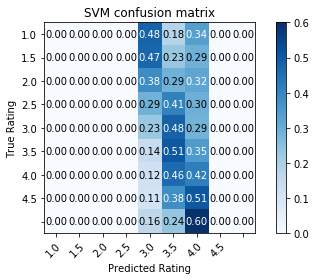

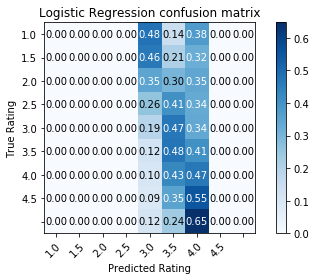

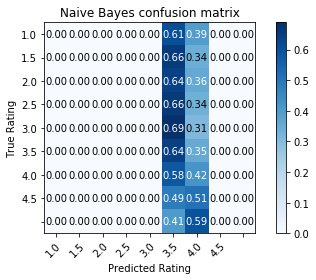

In [13]:
## plot confusion matrices for the models
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
          xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True Rating',
           xlabel='Predicted Rating')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
class_names = np.arange(1,5,0.5)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_predSVC, classes=class_names, normalize=True,
                      title='SVM confusion matrix')
plot_confusion_matrix(y_test, y_predLR, classes=class_names, normalize=True,
                      title='Logistic Regression confusion matrix')
plot_confusion_matrix(y_test, y_predNB, classes=class_names, normalize=True,
                      title='Naive Bayes confusion matrix')

plt.show()


RF
11


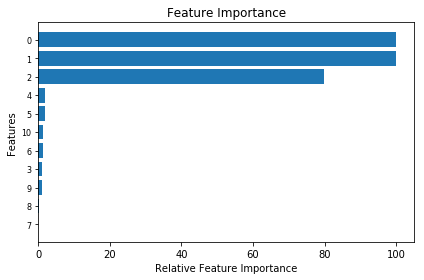

In [14]:
## feature imortance analysis

df = pd.read_csv('yelp_final.csv', header = 0)
df.drop(['Unnamed: 0.1','Unnamed: 0','business_id','is_open'],1,inplace=True)
original_headers = list(df.columns.values)

# extract numeric columns
numericColumns = df._get_numeric_data()

target=numericColumns["stars"].astype('str')


numericColumns.drop("stars", axis=1, inplace=True)

numeric_headers = list(numericColumns.columns.values)


numericColumns.to_csv('out3.csv', index=False, header=True)
x = numericColumns.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
numericColumns = pd.DataFrame(x_scaled)


numericColumns.to_csv('out2.csv', index=False, header=True)


#print(numeric_headers)
X_train, X_test, y_train, y_test = train_test_split(numericColumns, target, test_size=0.25, random_state=0)




# feature IMportance
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
feature_importance = abs(model.feature_importances_)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5


print("RF")
print(len(feature_importance))

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
featax.set_ylabel('Features')
featax.set_title('Feature Importance')
plt.tight_layout()   
plt.show()


